In [ ]:
## Creating Word Vector using Word2Vec

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [7]:
from nltk.corpus import gutenberg

In [8]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [9]:
len(gutenberg.fileids())

18

In [11]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [12]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [13]:
gberg_sent_tokens[:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [14]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [15]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [18]:
word_tokenize("아이폰8+ 새 제품 배터리 스웰링이 있었네요")

['아이폰8+', '새', '제품', '배터리', '스웰링이', '있었네요']

In [19]:
word_tokenize("아이폰8+새제품배터리스웰링이있었네요")

['아이폰8+새제품배터리스웰링이있었네요']

In [20]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [21]:
gberg_sents = gutenberg.sents()

In [22]:
gberg_sents

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [23]:
gberg_sents[:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [24]:
gberg_sents[4][14]

'father'

In [27]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [28]:
len(gutenberg.words())

2621613

#### Run word2vec

In [29]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [30]:
model.save('raw_gutenberg_model.w2v')

In [31]:
model['dog']

array([-0.07287128, -0.21895041,  0.50089961, -0.18768243, -0.14252156,
        0.01486796,  0.40347156, -0.07499612,  0.24756658,  0.01703217,
       -0.08338929,  0.03896967,  0.38482124, -0.30124941, -0.1015084 ,
       -0.39981475, -0.36272708, -0.10503712,  0.18202372,  0.07484969,
        0.33015215, -0.19984138, -0.16238409, -0.12887356, -0.4382332 ,
       -0.53418607,  0.14237912, -0.37888661, -0.18201815, -0.31504101,
        0.33080477,  0.12582567, -0.16563819, -0.46827134,  0.07930461,
       -0.17694385,  0.09651385, -0.04543595, -0.22938986,  0.13163507,
        0.14778599,  0.61116242, -0.56270665, -0.04190263,  0.0094288 ,
       -0.6537683 ,  0.1226549 ,  0.09278046, -0.44691235, -0.07296982,
       -0.66256815, -0.45016944, -0.01119038,  0.17241599, -0.0547052 ,
        0.23399252, -0.11442073,  0.42560816,  0.17819034, -0.55136949,
        0.0229524 , -0.43764222,  0.24359696,  0.26349312], dtype=float32)

In [32]:
len(model['dog'])

64

In [33]:
model.most_similar('dog')

[('puppy', 0.8218366503715515),
 ('sweeper', 0.7896862030029297),
 ('broth', 0.7843140363693237),
 ('cage', 0.7796775698661804),
 ('cow', 0.7711084485054016),
 ('boy', 0.7704765200614929),
 ('pig', 0.7679362297058105),
 ('Truck', 0.7616097927093506),
 ('pet', 0.7581656575202942),
 ('chimney', 0.7569102048873901)]

In [35]:
model.most_similar('think')

[('suppose', 0.8481776714324951),
 ('know', 0.8366438746452332),
 ('manage', 0.8317890167236328),
 ('interfere', 0.8269733190536499),
 ('NOW', 0.8169525265693665),
 ('believe', 0.8116503953933716),
 ('Mamma', 0.8109026551246643),
 ('contradict', 0.8096334338188171),
 ('shouldn', 0.8039518594741821),
 ('anyhow', 0.8001487255096436)]

In [36]:
model.most_similar('father')

[('mother', 0.8756468892097473),
 ('brother', 0.8503808975219727),
 ('wife', 0.7955025434494019),
 ('sister', 0.7942567467689514),
 ('daughter', 0.7784944772720337),
 ('Amnon', 0.7646536231040955),
 ('Tamar', 0.7502715587615967),
 ('uncle', 0.745048999786377),
 ('servant', 0.7361636757850647),
 ('bondwoman', 0.7323877215385437)]

In [40]:
model.doesnt_match("mother father daughter dog".split())

'dog'

In [43]:
model.similarity('father', 'dog')

0.4748701070836307

In [45]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('sister', 0.7925474643707275),
 ('daughter', 0.7800456285476685),
 ('wife', 0.7742092609405518),
 ('husband', 0.7729899883270264),
 ('mother', 0.7700901031494141),
 ('Rachel', 0.7323673963546753),
 ('Tamar', 0.7207849025726318),
 ('Sarah', 0.7181402444839478),
 ('conceived', 0.7038712501525879),
 ('brother', 0.7023296356201172)]

In [48]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn = 30)

[('Rachel', 0.7283658385276794),
 ('Sarah', 0.7141726016998291),
 ('Laban', 0.7108159065246582),
 ('Abram', 0.7001656293869019),
 ('Leah', 0.69834303855896),
 ('Pharaoh', 0.6943529844284058),
 ('Rebekah', 0.6941794157028198),
 ('Padanaram', 0.6844695806503296),
 ('daughter', 0.6824924945831299),
 ('Hagar', 0.6811469793319702),
 ('household', 0.6602296829223633),
 ('Onan', 0.6565342545509338),
 ('Judah', 0.6546964049339294),
 ('queen', 0.6529080867767334),
 ('Bilhah', 0.6513807773590088),
 ('Hamor', 0.6500070095062256),
 ('Shechem', 0.6478291749954224),
 ('Ephron', 0.6464332938194275),
 ('damsel', 0.6462661027908325),
 ('Babylon', 0.6447507739067078),
 ('Bethuel', 0.6444916725158691),
 ('Solomon', 0.6433350443840027),
 ('birthright', 0.6425222754478455),
 ('Zilpah', 0.6415820717811584),
 ('conceived', 0.6408166885375977),
 ('Esau', 0.6407237648963928),
 ('tribute', 0.6389332413673401),
 ('Sarai', 0.6378238201141357),
 ('Lot', 0.6362273097038269),
 ('Esther', 0.6354512572288513)]

In [49]:
model.most_similar(positive=['husband', 'woman'], negative=['man'], topn = 30)

[('wife', 0.7153858542442322),
 ('sister', 0.712942898273468),
 ('daughter', 0.6754405498504639),
 ('child', 0.6618490219116211),
 ('maid', 0.6545268297195435),
 ('mother', 0.6543440818786621),
 ('Rachel', 0.6373889446258545),
 ('conceived', 0.6334811449050903),
 ('elder', 0.6305655837059021),
 ('womb', 0.6286050081253052),
 ('Tamar', 0.6235758066177368),
 ('whoredoms', 0.6177126169204712),
 ('adultery', 0.6171149015426636),
 ('nurse', 0.6166940331459045),
 ('younger', 0.602920651435852),
 ('widow', 0.6012293100357056),
 ('herself', 0.5998765230178833),
 ('harlot', 0.599200963973999),
 ('daughters', 0.5990067720413208),
 ('Amnon', 0.5930418968200684),
 ('married', 0.5897575616836548),
 ('handmaid', 0.5878466367721558),
 ('bare', 0.5875099897384644),
 ('Sarah', 0.584486186504364),
 ('Leah', 0.5833151340484619),
 ('marry', 0.5793570280075073),
 ('committeth', 0.5793129205703735),
 ('Mary', 0.5785118937492371),
 ('Sarai', 0.5724281668663025),
 ('Hagar', 0.5670788884162903)]

In [51]:
model.most_similar(positive=['son', 'woman'], negative=['man'], topn = 100)

[('Rachel', 0.7510932087898254),
 ('daughter', 0.7503650784492493),
 ('Sarah', 0.7488892078399658),
 ('Hagar', 0.7476844787597656),
 ('Leah', 0.7435696125030518),
 ('conceived', 0.7276624441146851),
 ('Rebekah', 0.7218119502067566),
 ('Sarai', 0.7201859951019287),
 ('wife', 0.7177450060844421),
 ('Onan', 0.7142730951309204),
 ('Esau', 0.7067197561264038),
 ('Abram', 0.7062598466873169),
 ('Caleb', 0.7034053206443787),
 ('Zilpah', 0.6963765621185303),
 ('Bilhah', 0.6960214376449585),
 ('Jesse', 0.6959735155105591),
 ('Bethuel', 0.6933231949806213),
 ('bare', 0.6929922699928284),
 ('Jephunneh', 0.6867851614952087),
 ('Tamar', 0.6861453652381897),
 ('Nahor', 0.6857469081878662),
 ('Hittite', 0.682796835899353),
 ('Laban', 0.6801763772964478),
 ('Milcah', 0.6759402751922607),
 ('Er', 0.6700998544692993),
 ('Shelah', 0.6696180701255798),
 ('Hamor', 0.6691362857818604),
 ('sister', 0.6690043210983276),
 ('Adah', 0.6681321859359741),
 ('firstborn', 0.6603237390518188),
 ('Haran', 0.6601136922

#### Reduce word vector dimensionality with t-SNE

In [ ]:
len(model.wv.vocab)

In [ ]:
X = model[model.wv.vocab]
X

In [69]:
tsne = TSNE(n_components=2, n_iter=1000)

In [70]:
X_2d = tsne.fit_transform(X)

In [71]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [72]:
coords_df.head()

,x,y,token
0,-50.002048,-41.259762,[
1,-22.734066,-57.002190,Emma
2,-33.784725,-10.012033,by
3,-25.874945,-56.321266,Jane
4,-49.947948,-41.226650,]


In [78]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'raw_gutenberg_tsne.csv'

#### Visualize 2D Representation of Word Vectors

In [79]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [81]:
coords_df.head(100)

,x,y,token
0,46.303001,-35.079086,[
1,-12.367288,-61.319038,Emma
2,-34.883221,-19.249060,by
3,-15.818788,-61.847733,Jane
4,46.256916,-35.037937,]
5,27.497726,-26.815804,I
6,41.514771,59.672352,CHAPTER
7,-16.410595,-62.021557,Woodhouse
8,-34.404427,-20.227993,","
9,18.311426,-54.221550,handsome


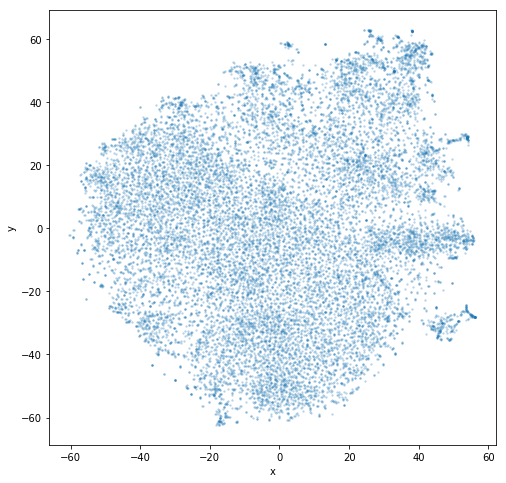

In [83]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [84]:
output_notebook()

Loading BokehJS ...

In [85]:
subset_df = coords_df.sample(n=5000)

In [86]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [88]:
show(p)